In [1]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn.decomposition import PCA

import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from matplotlib import figure
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
matplotlib.rcParams.update({'font.size': 22})
import seaborn as sns

print(__doc__)

from time import time

Automatically created module for IPython interactive environment


## Read in data as csv 

In [2]:
data=pd.read_table('/Users/gracer/Google Drive/ABCD/important_txt/4Kmeans.csv', sep=',')

## Seperate by sex

In [3]:
dudes = data[data['sex'] >= 0]
lady_dudes = data[data['sex'] >= 1]

## Get a List of variable names

In [4]:
var_names=list(lady_dudes.columns.values)
cols = lady_dudes.columns
print(cols)
cols[1]

Index([u'src_subject_id', u'pds_ht2_y', u'pds_skin2_y', u'pds_bdyhair_y',
       u'PDS', u'pds_f4_2_y', u'pds_f5_y', u'pds_m4_y', u'pds_m5_y',
       u'interview_age', u'gender', u'anthroheightcalc', u'anthroweightcalc',
       u'anthro_waist_cm', u'hormone_scr_dhea_mean', u'hormone_scr_hse_mean',
       u'hormone_scr_ert_mean', u'sex'],
      dtype='object')


'pds_ht2_y'

## Combine variables of interest into a single matrix

In [5]:
labels_true=lady_dudes['PDS'].values
f2=lady_dudes['pds_ht2_y'].values
f3=lady_dudes['pds_skin2_y'].values
f4=lady_dudes['pds_bdyhair_y'].values
f5=lady_dudes['pds_f4_2_y'].values
f6=lady_dudes['pds_f5_y'].values
f7=lady_dudes['interview_age'].values
f8=lady_dudes['anthroheightcalc'].values 
f9=lady_dudes['anthroweightcalc'].values
f10=lady_dudes['anthro_waist_cm'].values
f11=lady_dudes['hormone_scr_dhea_mean'].values
f12=lady_dudes['hormone_scr_hse_mean'].values
f13=lady_dudes['hormone_scr_ert_mean'].values
X=np.matrix(zip(f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13))

## Create a list of the variable names included in this analyses

In [6]:
names=['pds_ht2_y',
'pds_skin2_y'
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc',
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']

## Check the data 

[(1, 610), (2, 271), (3, 20), (4, 2)]

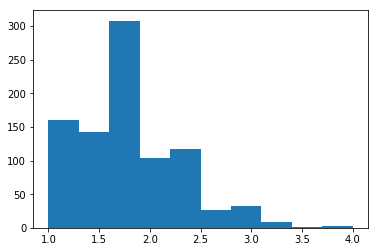

In [7]:
%matplotlib inline
plt.hist(labels_true)
y = np.bincount(labels_true.astype(int))
ii = np.nonzero(y)[0]
zip(ii,y[ii])

An issue is a low number of people in groups 3 and 4

## Possible solution, randomly sample equal numbers
Using the rule of thumb 2^m I need 8 people per cluster 
Possible combinations below

In [8]:
import math
x=math.factorial(70)
y=math.factorial(70-20)
fact=x/y
print(fact)

393849377343759797528386895216640000


## Create target variable (or the one you are comparing)

In [9]:
target_var=pd.DataFrame(lady_dudes['PDS'].values)

## Impute missing values
This will not allow missing data, so have to impute nans

In [10]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
transformed_values_scale = scale(transformed_values)
#the target variable is the last variable
trans = np.hstack((transformed_values_scale,target_var.round(decimals=0)))

0


In [11]:
transformed_values.shape

(903, 12)

## Function to randomly sample the data and perform the kmeans

In [12]:
def bench_k_means(estimator, name, data):
        t0 = time() #time
        estimator.fit(data) #estimating the fit 
        print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (name, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)))


In [13]:
def meaner(**kwargs):
    for x in kwargs.items():
        print(x)
#     z=sum(*arg)/len(*arg)
#     return z

In [14]:
def PCA_reducer(DATA):
    n_samples, n_features = DATA.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples
    
    PCA_results = PCA(n_components=2)
    reduced_data = PCA_results.fit_transform(DATA)
    
    # Dump components relations with features:
    print pd.DataFrame(PCA_results.components_,index = ['PC-1','PC-2'])
    plt.semilogy(PCA_results.explained_variance_ratio_, '--o')
    return (PCA_results.components_, PCA_results.explained_variance_ratio_, 
            PCA_results.explained_variance_, PCA_results.mean_) 
    


In [15]:
def random_selct(DATA,i):
    print('start')
    dictr = {}
    #defining the levels, based on the final column add the values to the dictionary
    levels = ['lev1','lev2','lev3']
    i=1
    for lev in levels:
        if i < len(levels)+1:
            dictr[lev] = DATA[np.where(DATA[:,-1] == i)]
            i=i+1
    
    rand_dict={}
    target_dict={}
    ind_dict={}
    for key, value in dictr.iteritems():
        #shuffle the data's index
        ind = np.random.permutation(value.shape[0])#random index
        #get the first 20 subjects indexes
        training_idx = ind[:50]#get 20 subjects indexes
        #get the first 20 subjects
        training = value[training_idx,:]#select 20 subjects from the value in the dictionary
        #saving the true labels
        labels_true = training[:,-1] #get the labels from the value in the dictiornary last column
        target_dict[key] = labels_true #add targets to dictionary
        rand_dict[key] = training #match the randomized data to the ind_dict by key 
        ind_dict[key] = training_idx #add the indexes to the dictionary
    
    '''
    combine all the dictionaries we have created thus far. 
    data, index, and targets
    '''
    
    #combine the randomized data by the actual level
    data=np.vstack((rand_dict['lev1'],rand_dict['lev2'],rand_dict['lev3']))
    
    ###################################################
    data=np.delete(data,12,1)# remove the label column
    ###################################################
    
    
    #combine the true labels into targets
    targets=np.hstack((target_dict['lev1'],target_dict['lev2'],target_dict['lev3']))
    #combine the indexes into one
    indexes=np.hstack((ind_dict['lev1'],ind_dict['lev2'],ind_dict['lev3']))
    
    '''
    defining the parameters for the k means and the PCA
    '''
    
    n_samples, n_features = data.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples

    '''
    defining the parameters for the k means
    '''    
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=300)
    
    
    
    
    ###########################################
    #            rebuild to combine data      #
    ###########################################
    comb_data = np.column_stack((data, kmeans.fit_predict(data)))#makes first column the index value
    full_data = np.column_stack((indexes, comb_data))#makes first column the index value
    full_data = np.column_stack((full_data,labels))
    comb_dictr = {}
    '''
    seperating the data based on the fit predict value (found right above)
    '''
    i=0
    for lev in levels:
        if i < len(levels)+1:
            comb_dictr[lev] = comb_data[np.where(comb_data[:,-1] == i)]
            i=i+1
    '''
    defining the parameters for the PCA and running the PCA 
    '''
    ###########################################
    #            PCA                          #
    ###########################################
    PCA_dict={}
    PCA_data={}
    PCA_final = {}

    for key, value in comb_dictr.iteritems():
        PCA_dict[key] = PCA(n_components=2)
        #make sure the last column which is the predicted label isn't included
        PCA_data[key] = PCA_dict[key].fit_transform(value[:,0:12])
        #make sure the last column which is the predicted label isn't included
        ID = np.identity(value[:,0:12].shape[1])  # identity matrix
        coef = PCA_dict[key].transform(ID)
        PCA_final[key] = coef
        
        plt.semilogy(PCA_dict[key].explained_variance_ratio_, '--o', label = '%s'%key)
#     plt.legend()        

    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
#     plt.show()
    

    ####THINGS TO SAVE#############################################################################        
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    clusters = kmeans.fit_predict(data)
    cluster_space = kmeans.fit_transform(data)
    
    
    
    centroids = kmeans.cluster_centers_   
    
    Components = np.vstack((PCA_dict['lev1'].components_,
                            PCA_dict['lev2'].components_,PCA_dict['lev3'].components_))
    
    Var_ratio = PCA_final
    
    lev1_VarRatio = np.vstack((PCA_final['lev1']))
    lev2_VarRatio = np.vstack((PCA_final['lev2']))
    lev3_VarRatio = np.vstack((PCA_final['lev3']))
    
    ind_dict = np.hstack((ind_dict['lev1'],
                            ind_dict['lev2'],ind_dict['lev3']))
    
    ########################################################################################################
    return (clusters, cluster_space, centroids, 
            targets, ind_dict,
           Components, Var_ratio, 
           full_data,
           lev1_VarRatio,
           lev2_VarRatio,
           lev3_VarRatio,
           kmeans)

# 0clusters
# 1cluster_space, 
# 2centroids, 
# 3targets, 
# 4ind_dict,
# 5Components,
# 6Var_ratio, 
# 7full_data,
# 8lev1_VarRatio,
# 9lev2_VarRatio,
# 10lev3_VarRatio

In [16]:
def main(i):
    names = ['pds_ht2_y',
'pds_skin2_y',
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc', 
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean', 'labels_pred','labels_true']
    
    Clusters = []
    Cluster_space = []
    Centroids = []
    
    Comp = []
    Var_ratio = []
    
    Targets = []
    Indexes = []
    
    Full_data = []
    
    Lev1_VarRatio = []
    Lev2_VarRatio = []
    Lev3_VarRatio = []
    
    kmeans = []
    for x in range(0,i):
        Q = random_selct(trans,i)
        Clusters.append(Q[0])
        Cluster_space.append(Q[1])
        Centroids.append(Q[2])
        
        Targets.append(Q[3])
        Indexes.append(Q[4])
        
        Comp.append(Q[5])
        Var_ratio.append(Q[6])
        
        Full_data.append(Q[7])
        
        Lev1_VarRatio.append(Q[8].transpose())
        Lev2_VarRatio.append(Q[9].transpose())
        Lev3_VarRatio.append(Q[10].transpose())
        
        kmeans.append(Q[11])
    All_lev1Ratio = np.vstack(Lev1_VarRatio)
    All_lev2Ratio = np.vstack(Lev2_VarRatio)
    All_lev3Ratio = np.vstack(Lev3_VarRatio)
    
    All_clust = np.hstack(Clusters)
    All_clust_space = np.vstack(Cluster_space)
    
    All_labels = np.hstack(Targets)
    All_index = np.hstack(Indexes)
    
    All_comp = np.vstack(Comp)
    All_var_ratio = Var_ratio
    All_data = np.vstack(Full_data)
    
    print(All_data.shape)
    All_data=pd.DataFrame(data=All_data[1:,1:],index=All_data[1:,0], columns= names)
    return (All_clust ,All_clust_space,  
            All_labels , All_index, All_comp, All_var_ratio, 
            All_data, names, 
           All_lev1Ratio, All_lev2Ratio, All_lev3Ratio, kmeans)

start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
star

start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
star

start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
star

start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
start
star

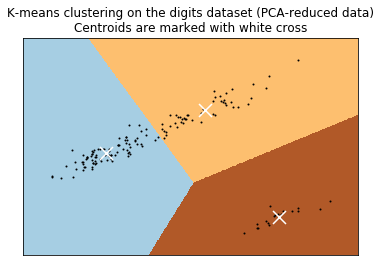

In [17]:
All_clust ,All_clust_space,All_labels , All_index, All_comp, All_var_ratio,All_data, names, All_lev1Ratio, All_lev2Ratio, All_lev3Ratio, kmeans = main(5000)

## Taking the variance from each K mean cluster and PCA, using PCA to find the most important factors over all

Lev3
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.287202     0.285553       0.288705    0.311994  0.298996   
PC-2   0.130110    -0.245627      -0.020905   -0.043027  0.005228   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.301624          0.268075          0.221842         0.239130   
PC-2       0.150570          0.171203          0.406240         0.435012   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.320050              0.340690              0.279544  
PC-2              -0.004564             -0.716038              0.037988  




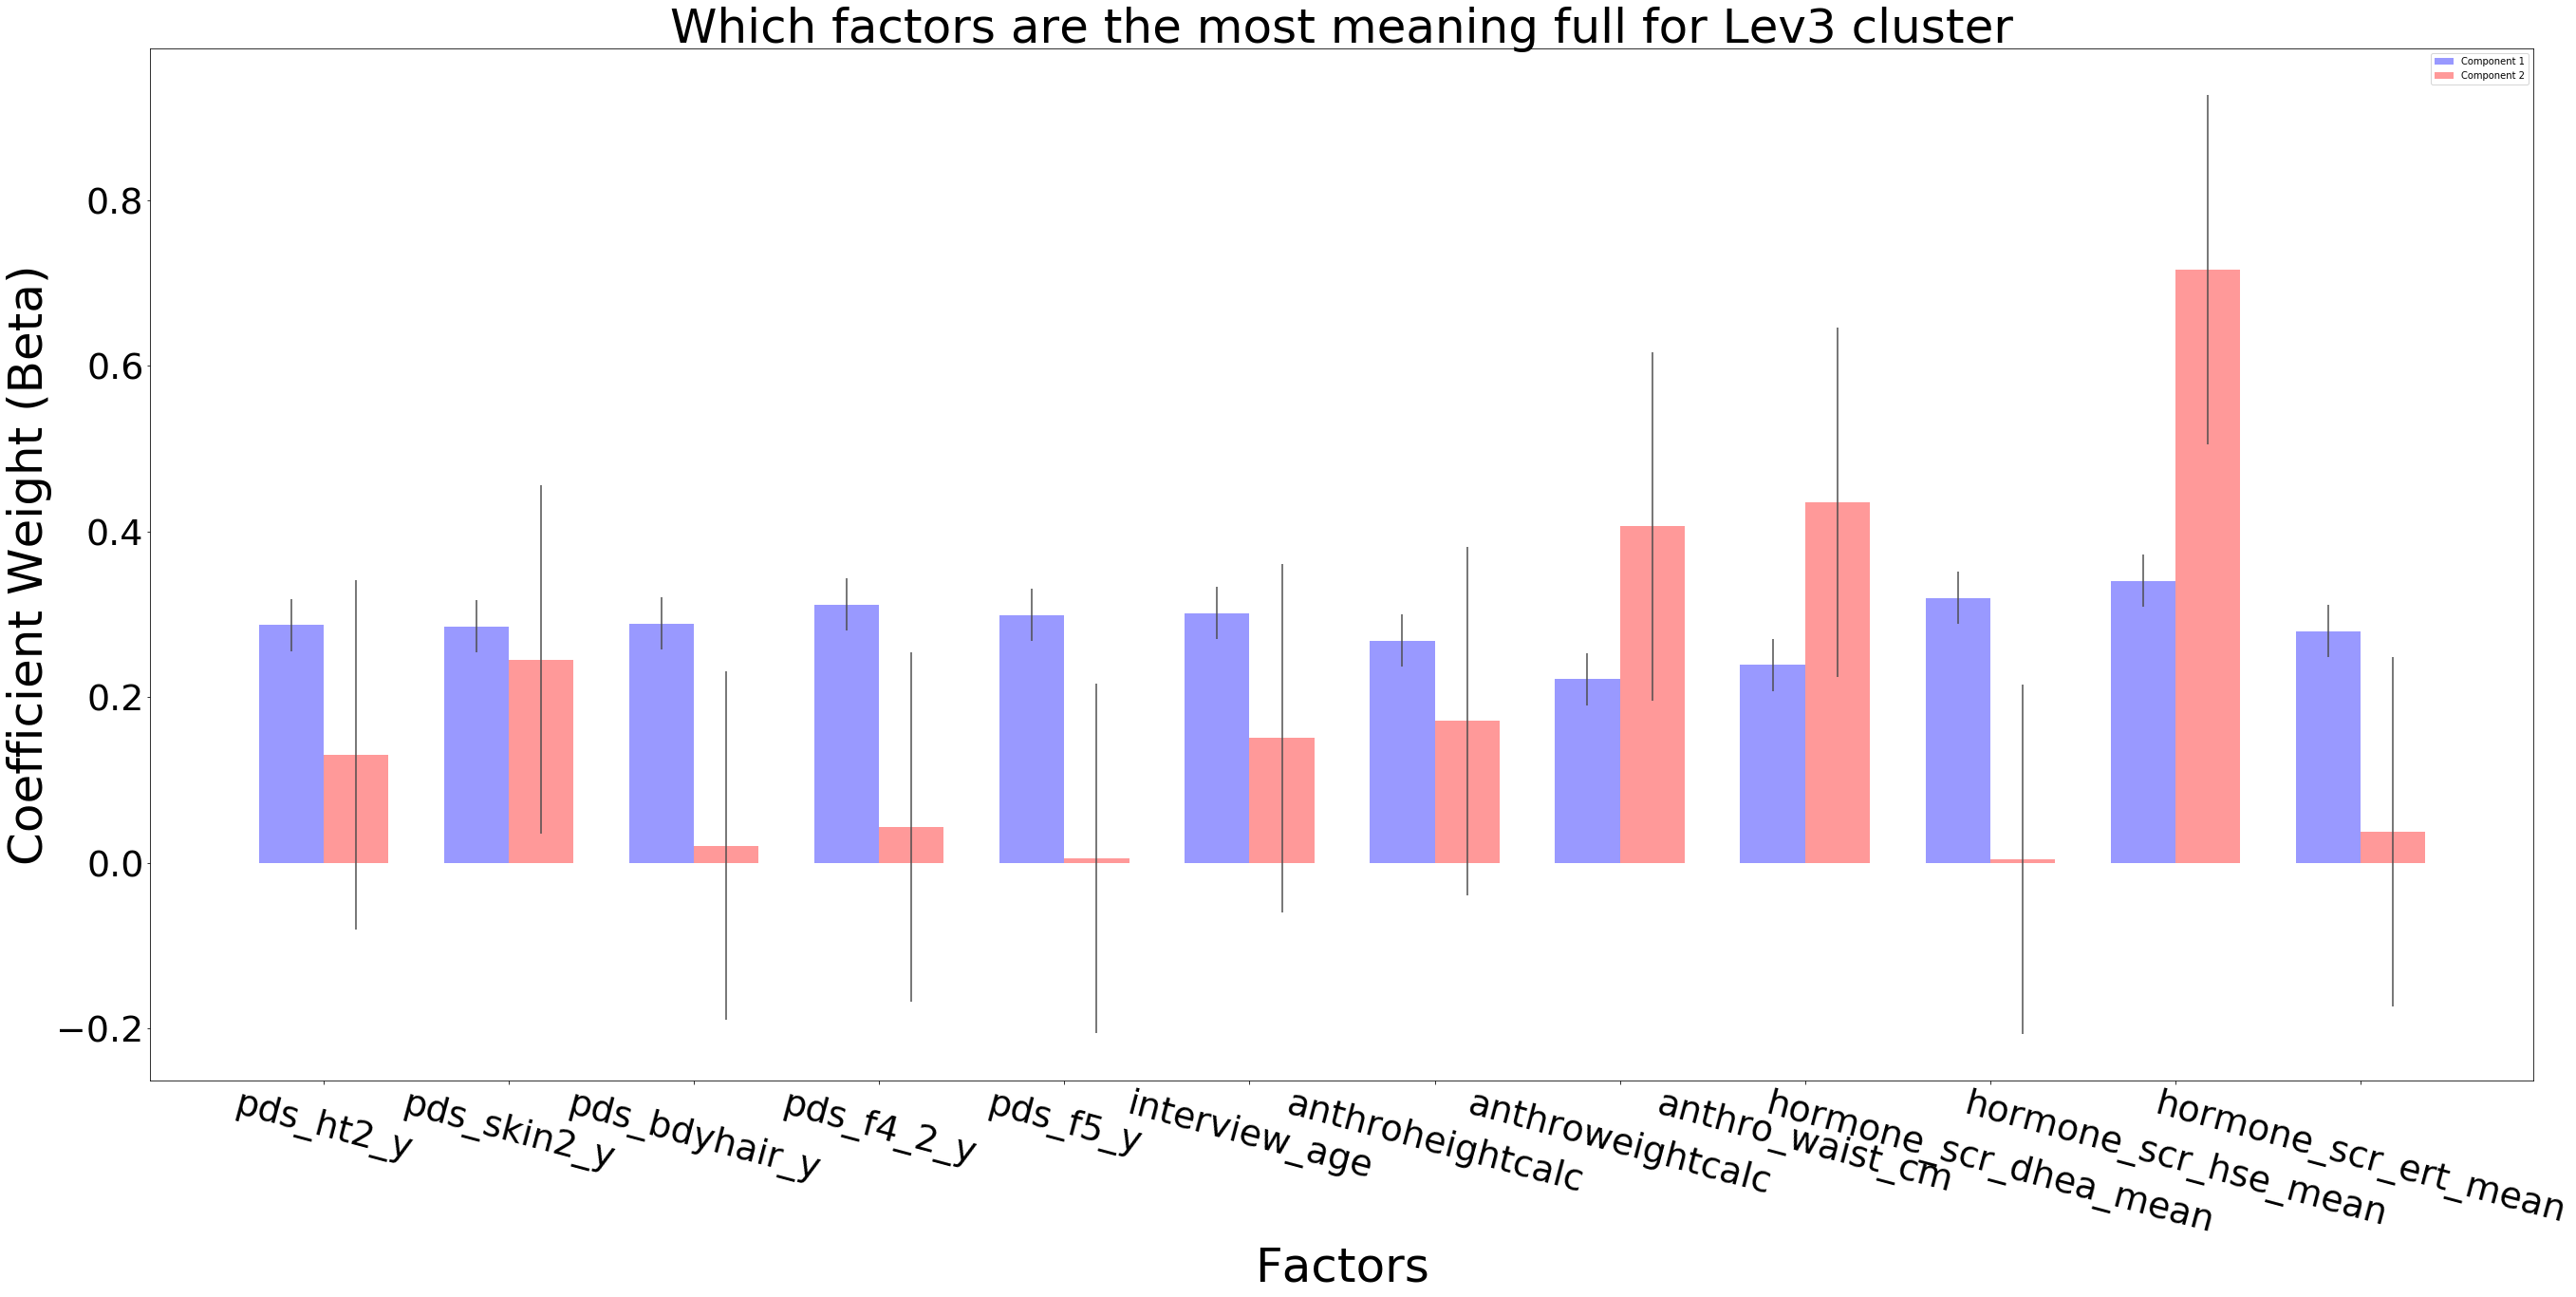

Lev2
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.290039     0.286671       0.281074    0.311869  0.291692   
PC-2   0.052014    -0.187639      -0.079250   -0.047167 -0.067743   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.310770          0.284875          0.231302         0.242322   
PC-2       0.225079          0.281705          0.417692         0.388691   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.308454              0.328305               0.28190  
PC-2              -0.090049             -0.695631               0.03762  




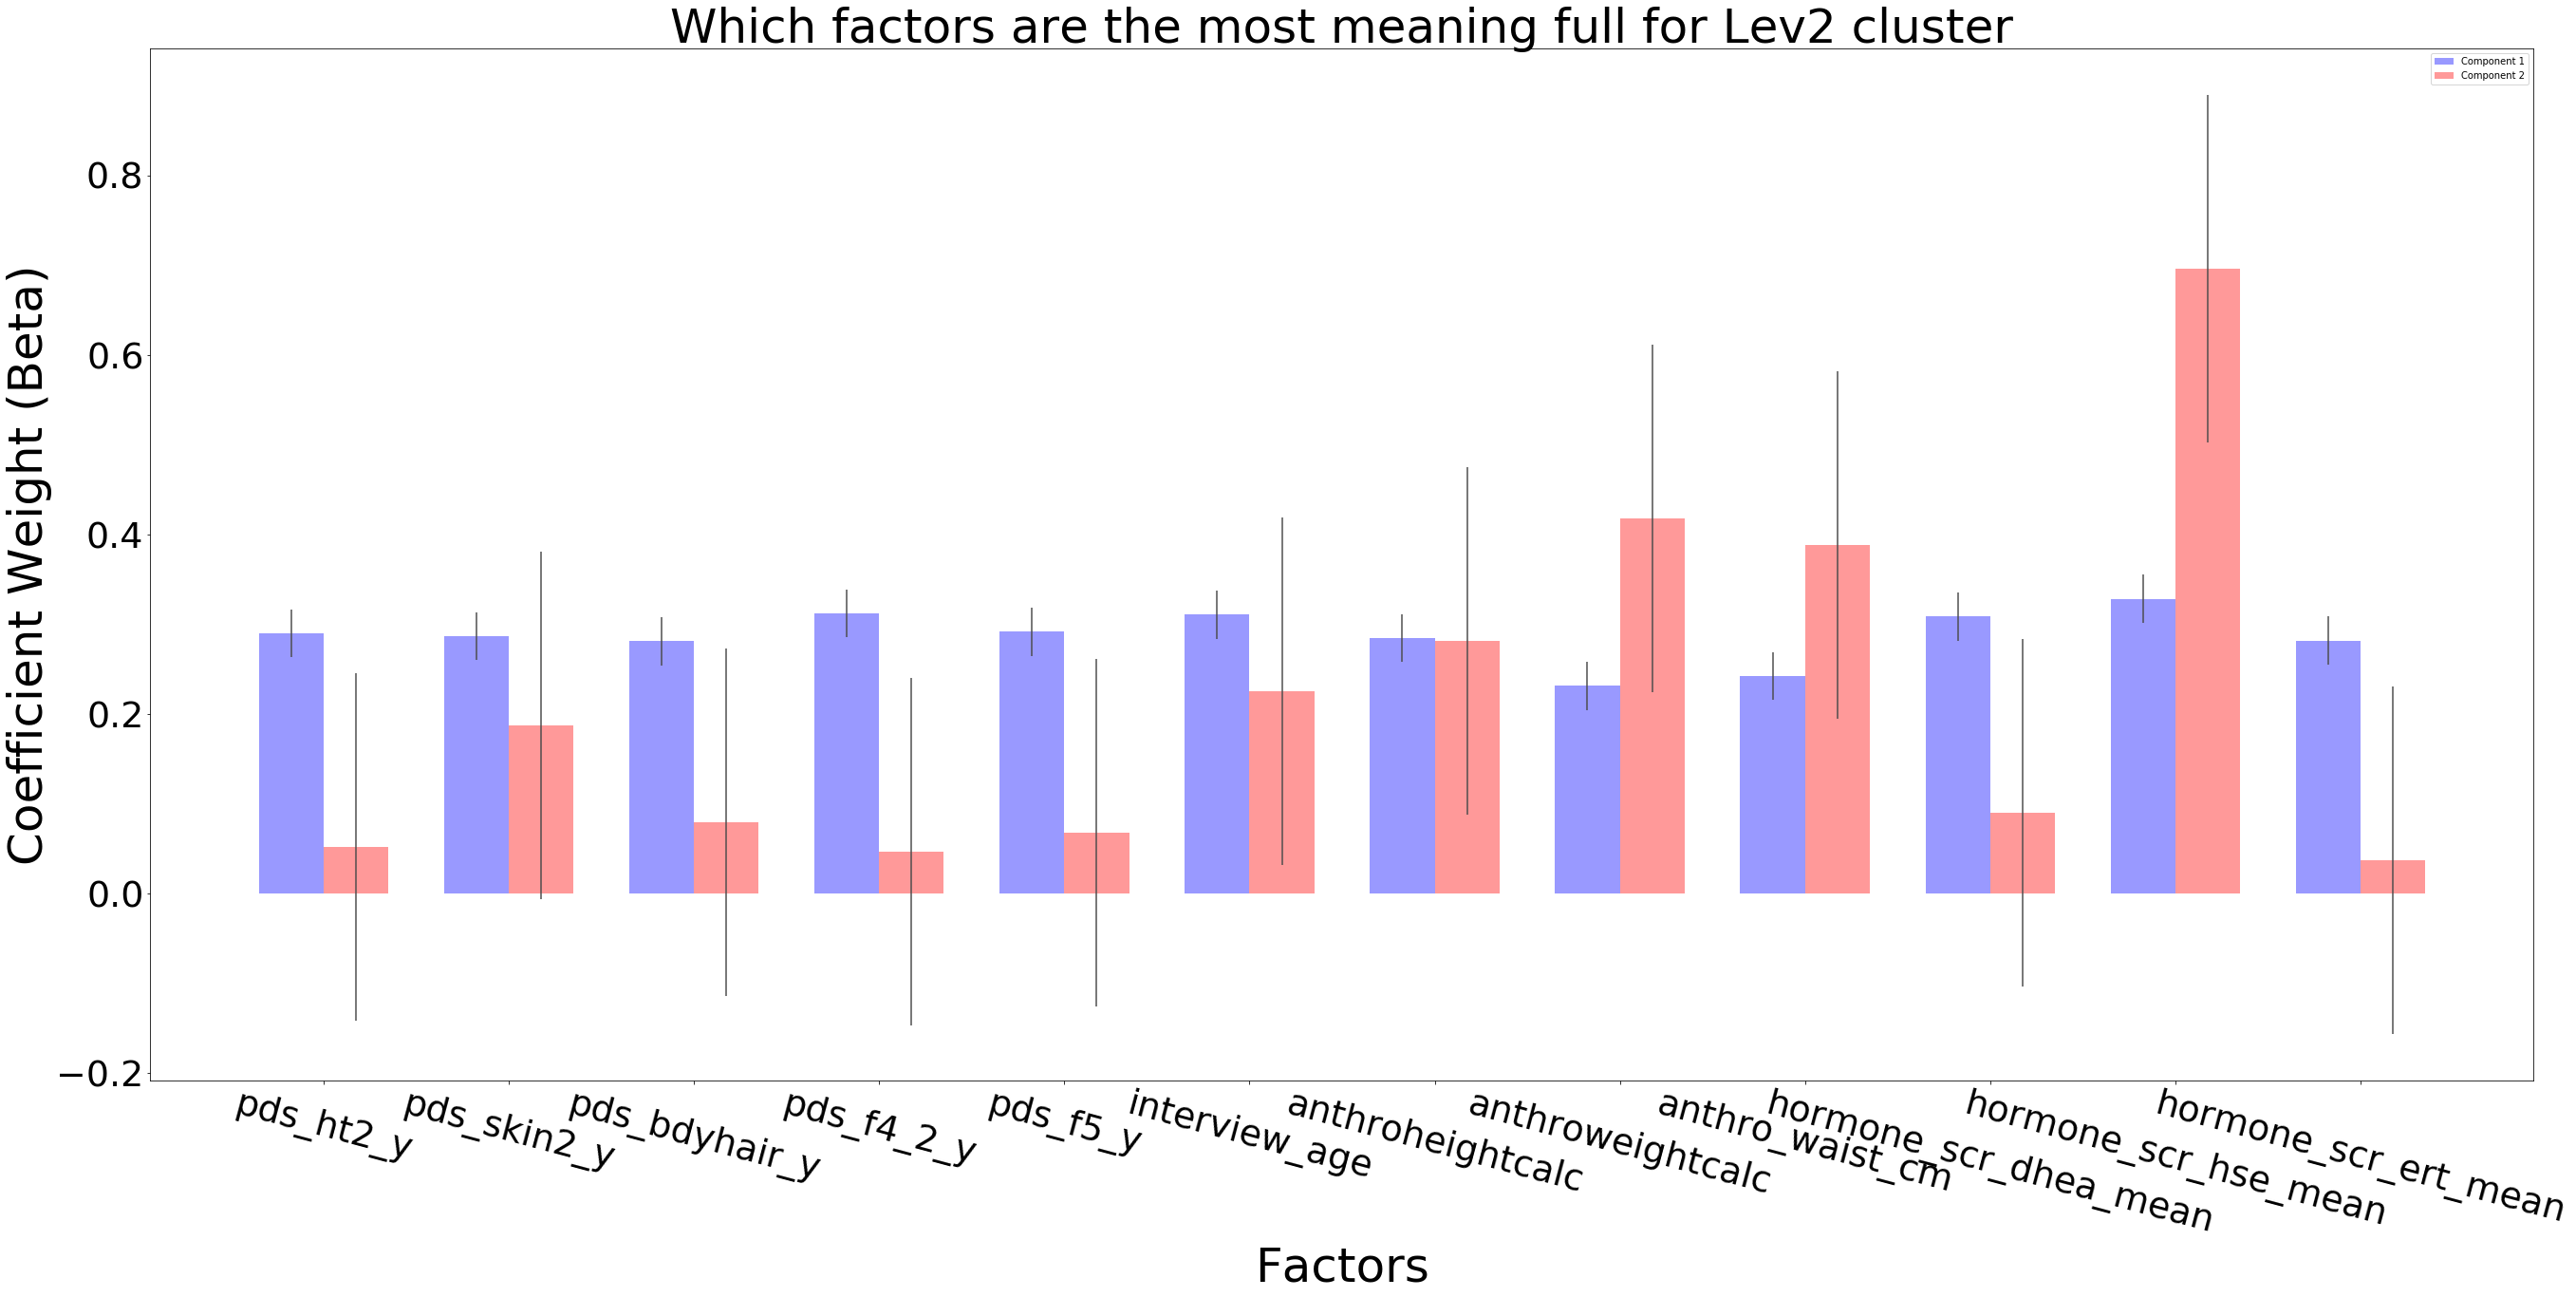

Lev1
      pds_ht2_y  pds_skin2_y  pds_bdyhair_y  pds_f4_2_y  pds_f5_y  \
PC-1   0.294598     0.283049       0.276335    0.308772  0.287957   
PC-2  -0.002336    -0.169071      -0.091788   -0.058609 -0.082858   

      interview_age  anthroheightcalc  anthroweightcalc  anthro_waist_cm  \
PC-1       0.317950          0.297233           0.23968         0.246690   
PC-2       0.226277          0.293398           0.41633         0.391686   

      hormone_scr_dhea_mean  hormone_scr_hse_mean  hormone_scr_ert_mean  
PC-1               0.298420              0.322471              0.278729  
PC-2              -0.095733             -0.691166              0.042159  




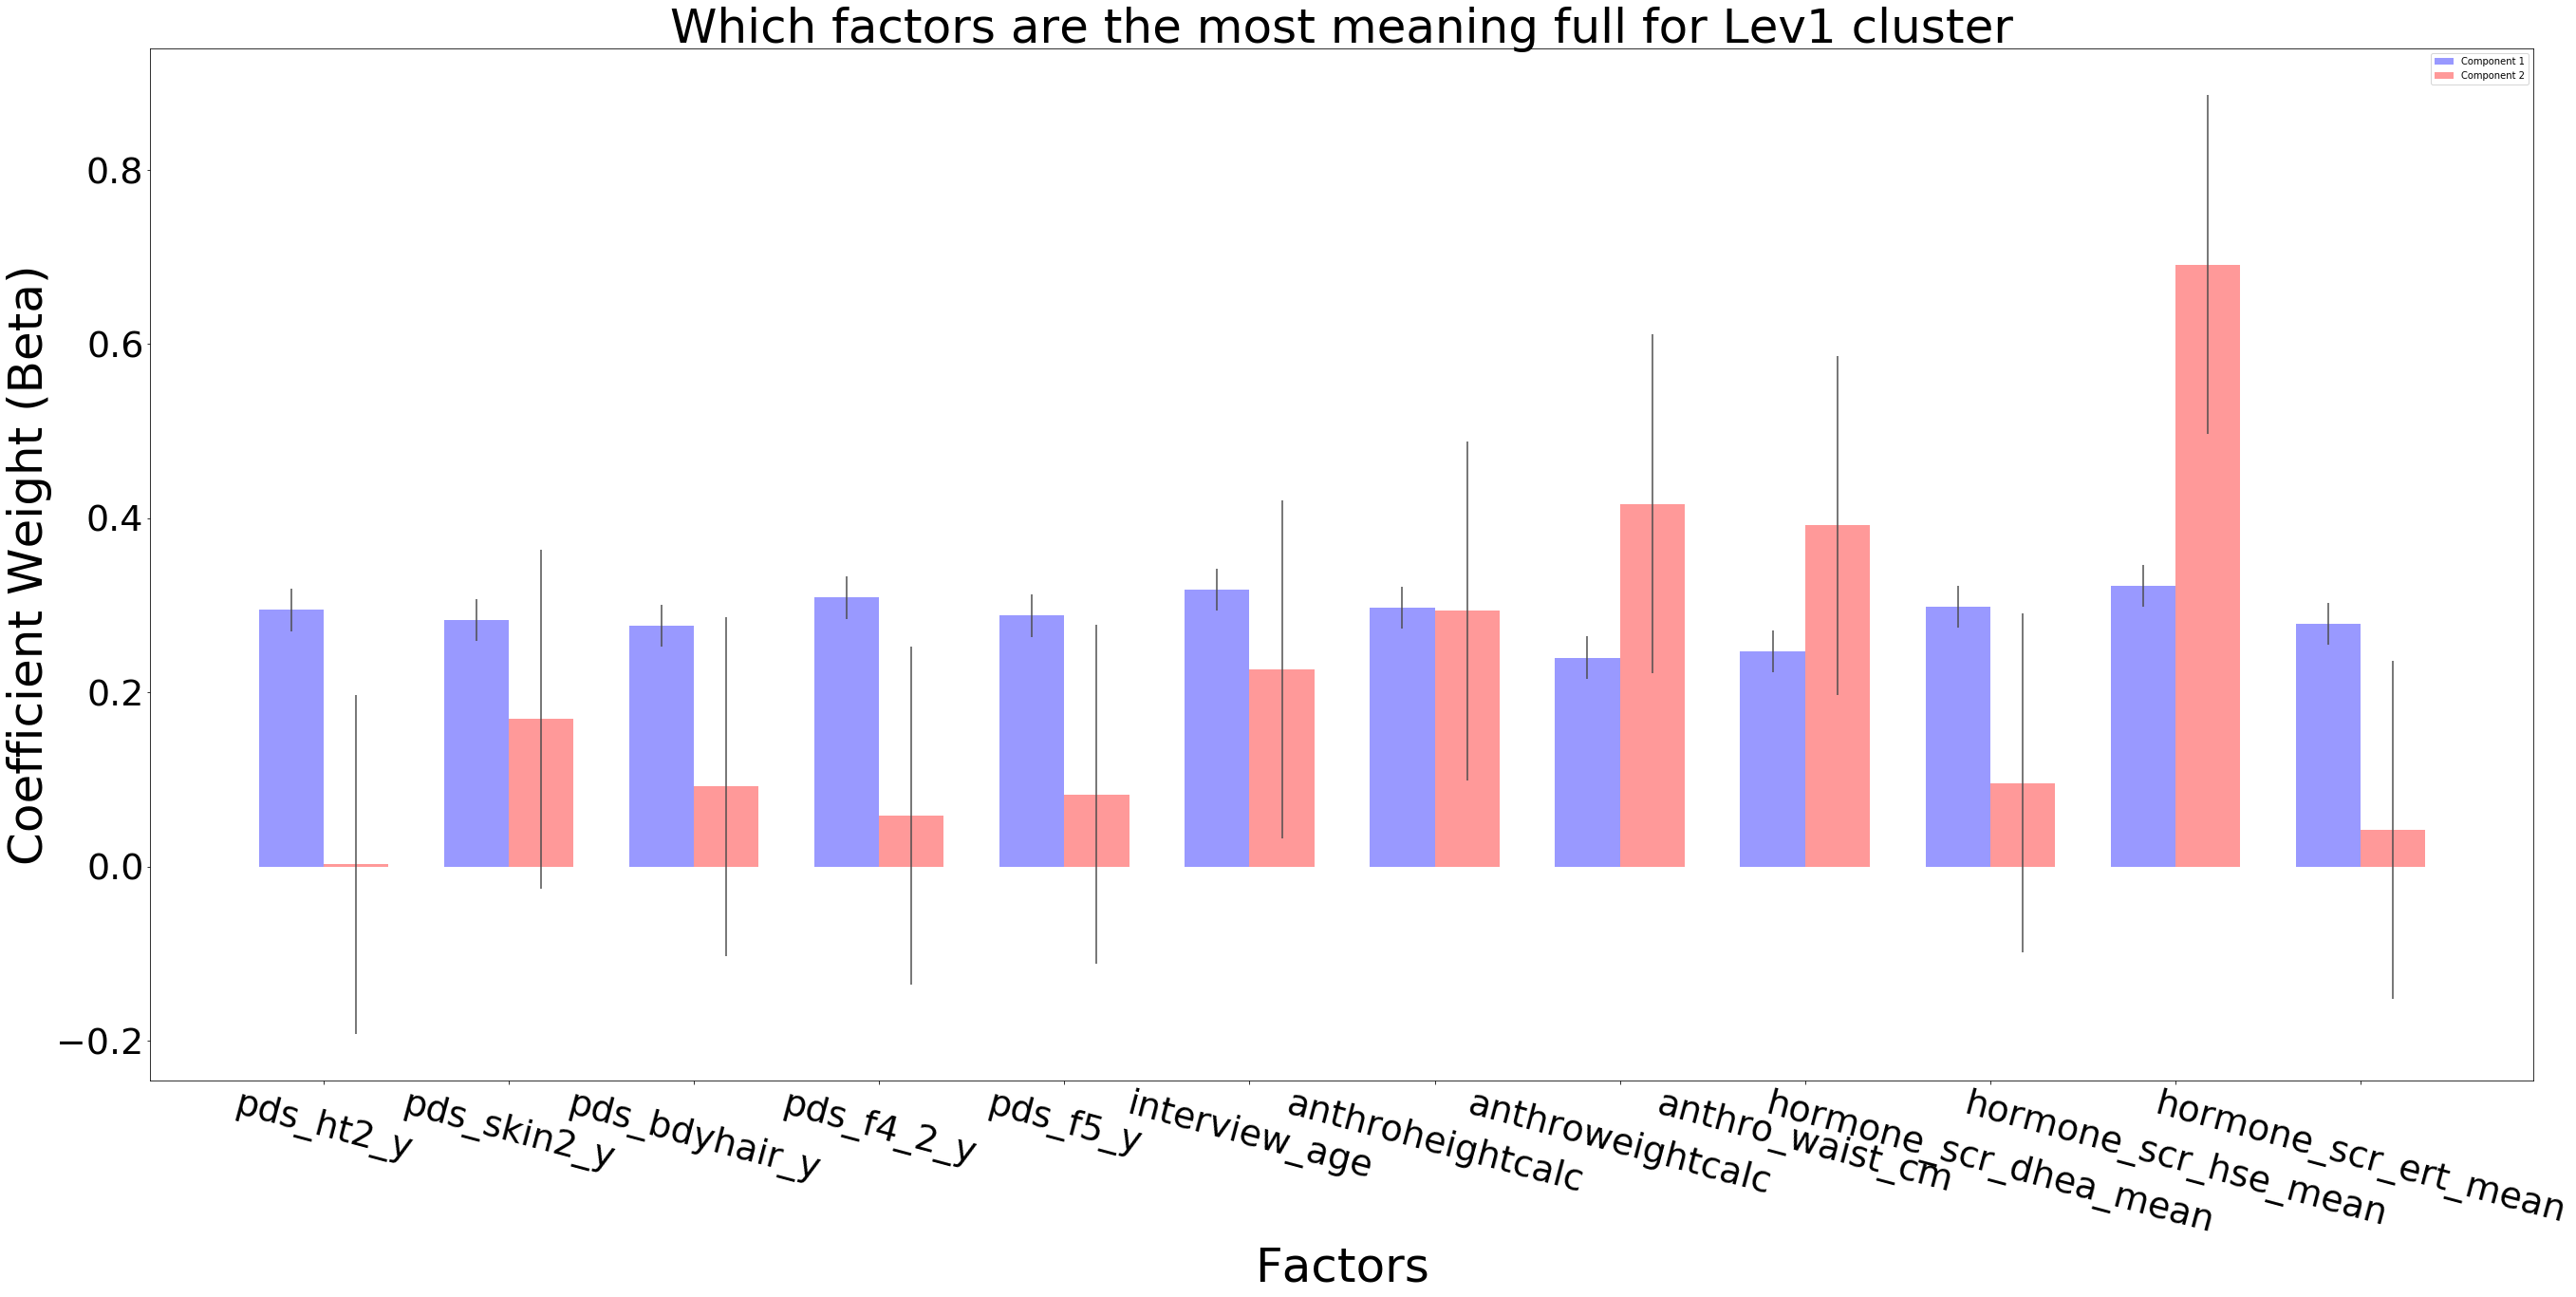

In [18]:
All_Ratios = {'Lev1': All_lev1Ratio, 'Lev2': All_lev2Ratio, 'Lev3':All_lev3Ratio}
Coefs = {}
index = np.arange(12)
for key, value in All_Ratios.iteritems(): 
    pca = PCA(n_components=2)
    pca.fit_transform(value)
    i = np.identity(value.shape[1])  # identity matrix
    Coefs[key] = pca.transform(i)
    print(key)
    print pd.DataFrame(pca.components_,columns=names[0:12],index = ['PC-1','PC-2'])
    print('\n')
    
    n_groups = 12

    means_CP1 = np.absolute(pca.components_[0,:])
    std_CP1 = np.matrix.std(np.matrix(np.absolute(pca.components_[0,:])))

    means_CP2 = np.absolute(pca.components_[1,:])
    std_CP2 = np.matrix.std(np.matrix(np.absolute(pca.components_[1,:])))

    fig, ax = plt.subplots(figsize=(45, 20))
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_CP1, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_CP1, error_kw=error_config,
                    label='Component 1')

    rects2 = ax.bar(index + bar_width, means_CP2, bar_width,
                    alpha=opacity, color='r',
                    yerr=std_CP2, error_kw=error_config,
                    label='Component 2')
    #plt.xlabel( fontsize=18)
    ax.set_xlabel('Factors', fontsize = 50)
    ax.set_ylabel('Coefficient Weight (Beta)', fontsize = 50)
    ax.set_title('Which factors are the most meaning full for %s cluster'%key, fontsize = 50)
    ax.set_xticks(index + bar_width / 2)
    
    ax.set_xticklabels(names[0:12], fontsize = 28, rotation = -15)
    ax.legend()
    ax.tick_params(labelsize = 38)

    fig=plt.figure(figsize=(100, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig.tight_layout()
    plt.show()
    

In [19]:
All_data.shape

(749999, 14)

## Looking at the data

merging the original and new data sets on the indexes

In [20]:
names2=['pds_ht2_yR',
'pds_skin2_yR',
'pds_bdyhair_yR',
'pds_f4_2_yR',
'pds_f5_yR',
'interview_ageR',
'anthroheightcalcR', 
'anthroweightcalcR',
'anthro_waist_cmR',
'hormone_scr_dhea_meanR',
'hormone_scr_hse_meanR',
'hormone_scr_ert_meanR']

In [21]:
testData = pd.DataFrame(data = transformed_values, columns= names2)
#print(testData)
total = pd.merge(testData, All_data, left_index = True, right_index = True,how = 'left')
total['INDY'] = total.index
total_g = total.groupby(['INDY'],axis = 0).mean()
total_g['labels_predR'] = total_g['labels_pred'].round()
total_g.head(10)

,pds_ht2_yR,pds_skin2_yR,pds_bdyhair_yR,pds_f4_2_yR,pds_f5_yR,interview_ageR,anthroheightcalcR,anthroweightcalcR,anthro_waist_cmR,hormone_scr_dhea_meanR,...,interview_age,anthroheightcalc,anthroweightcalc,anthro_waist_cm,hormone_scr_dhea_mean,hormone_scr_hse_mean,hormone_scr_ert_mean,labels_pred,labels_true,labels_predR
INDY,,,,,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,1.0,1.0,130.0,54.500000,68.500000,22.25,1089.0,...,0.583966,0.683060,1.632196,1.082712,-0.583870,-6.881846e-02,-1.761587e-01,0.923825,2.566549,1.0
1,3.0,3.0,1.0,1.0,1.0,109.0,57.500000,72.000000,23.50,667.0,...,0.795010,0.523309,0.031375,0.132360,-0.414923,-2.651591e-01,8.621758e-01,0.915240,2.574758,1.0
2,3.0,1.0,2.0,2.0,1.0,119.0,58.950000,96.600000,30.00,1528.0,...,0.969341,1.314710,2.262701,1.820879,-0.468095,-4.833610e-02,-3.275890e-02,1.145538,2.562969,1.0
3,2.0,1.0,1.0,2.0,1.0,119.0,54.833333,65.266667,21.80,214.0,...,0.807136,0.655086,0.086972,0.076112,-0.351168,-2.301594e-01,1.199050e+00,0.940203,2.558245,1.0
4,3.0,2.0,2.0,2.0,1.0,109.0,59.200000,94.800000,26.40,1.0,...,-0.348309,0.977539,1.574352,0.432856,-0.392405,-8.748092e-02,-3.414837e-01,1.149610,2.546034,1.0
5,1.0,1.0,1.0,2.0,1.0,119.0,53.140000,69.000000,23.75,2127.0,...,1.182084,0.360972,0.378359,0.388915,-0.868987,1.835644e-15,-9.680806e-15,1.158395,2.580232,1.0
6,2.0,1.0,1.0,1.0,1.0,108.0,50.000000,65.083333,26.00,1018.0,...,-0.040665,0.795014,-0.234762,-1.084990,-0.528066,-2.755029e-01,-1.355627e-03,0.949202,2.568526,1.0
7,2.0,1.0,1.0,1.0,1.0,132.0,58.000000,84.000000,28.00,1067.0,...,-0.782222,0.118651,0.990765,1.283956,-0.542714,-6.920441e-02,-3.540254e-01,0.938673,2.562639,1.0
8,4.0,1.0,4.0,4.0,1.0,126.0,59.000000,141.950000,35.00,23.0,...,0.424207,1.600140,1.179857,0.171346,-0.337653,-5.422408e-02,1.089226e-01,1.165257,2.571075,1.0


In [22]:
x=total_g.groupby(['labels_predR'], axis =0).describe()
x['anthroweightcalcR']#weight lbs

,count,mean,std,min,25%,50%,75%,max
labels_predR,,,,,,,,
1.0,529.0,83.858289,24.44381,44.0,67.083333,77.0,93.75,216.466667


In [23]:
T=total_g.groupby(['labels_predR'], axis =0).describe()
T['hormone_scr_hse_meanR'] #testosterone

,count,mean,std,min,25%,50%,75%,max
labels_predR,,,,,,,,
1.0,529.0,2.560751,5.437831,0.0,1.1275,1.8355,2.566487,67.6165


In [24]:
WC=total_g.groupby(['labels_predR'], axis =0).describe()
WC['anthro_waist_cmR']# waist circ

,count,mean,std,min,25%,50%,75%,max
labels_predR,,,,,,,,
1.0,529.0,26.531884,5.008562,18.0,23.5,25.5,28.0,75.0


In [25]:
Skin=total_g.groupby(['labels_predR'], axis =0).describe()
Skin['pds_skin2_yR']# skin

,count,mean,std,min,25%,50%,75%,max
labels_predR,,,,,,,,
1.0,529.0,1.73535,0.803577,1.0,1.0,2.0,2.0,4.0


In [26]:
total_g['pds_skin2_yR'].std()

0.7717514353468314

## A Nice Plot example

In [27]:
# # print(All_data)
# # df2 = pd.DataFrame(group.describe().rename(columns={'interview_age':labels_pred}).squeeze()
# #                          for name, group in All_data.groupby('labels_pred'))

# # print(df2)
# subs=list(All_data.index.values)
# len(subs)
# All_data.interview_age.describe()

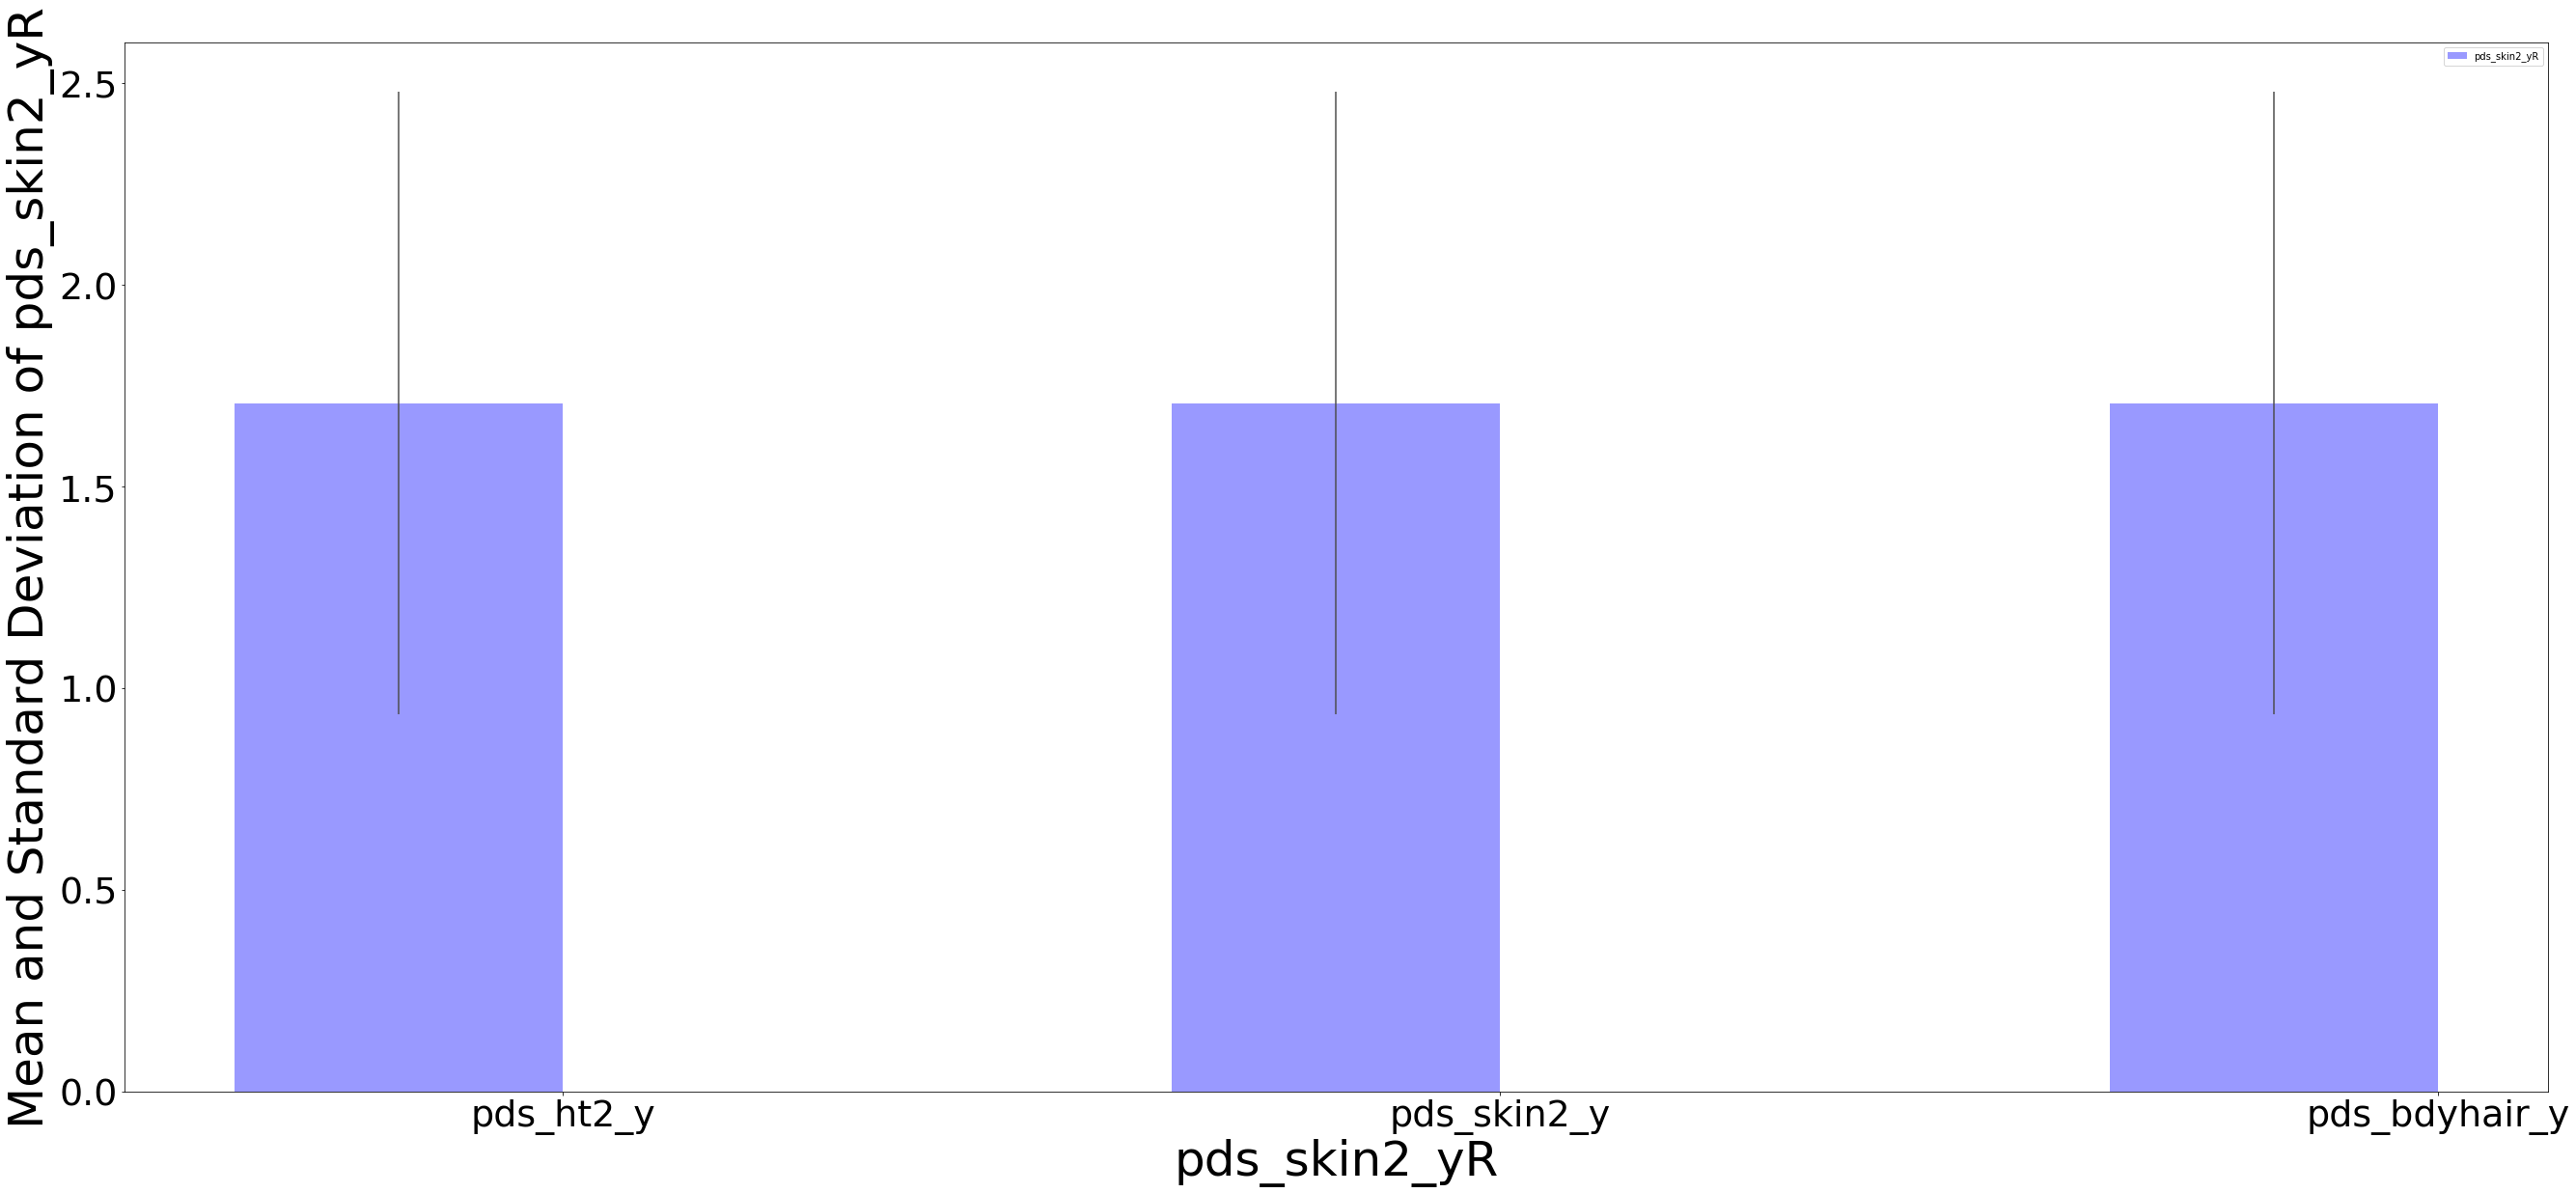

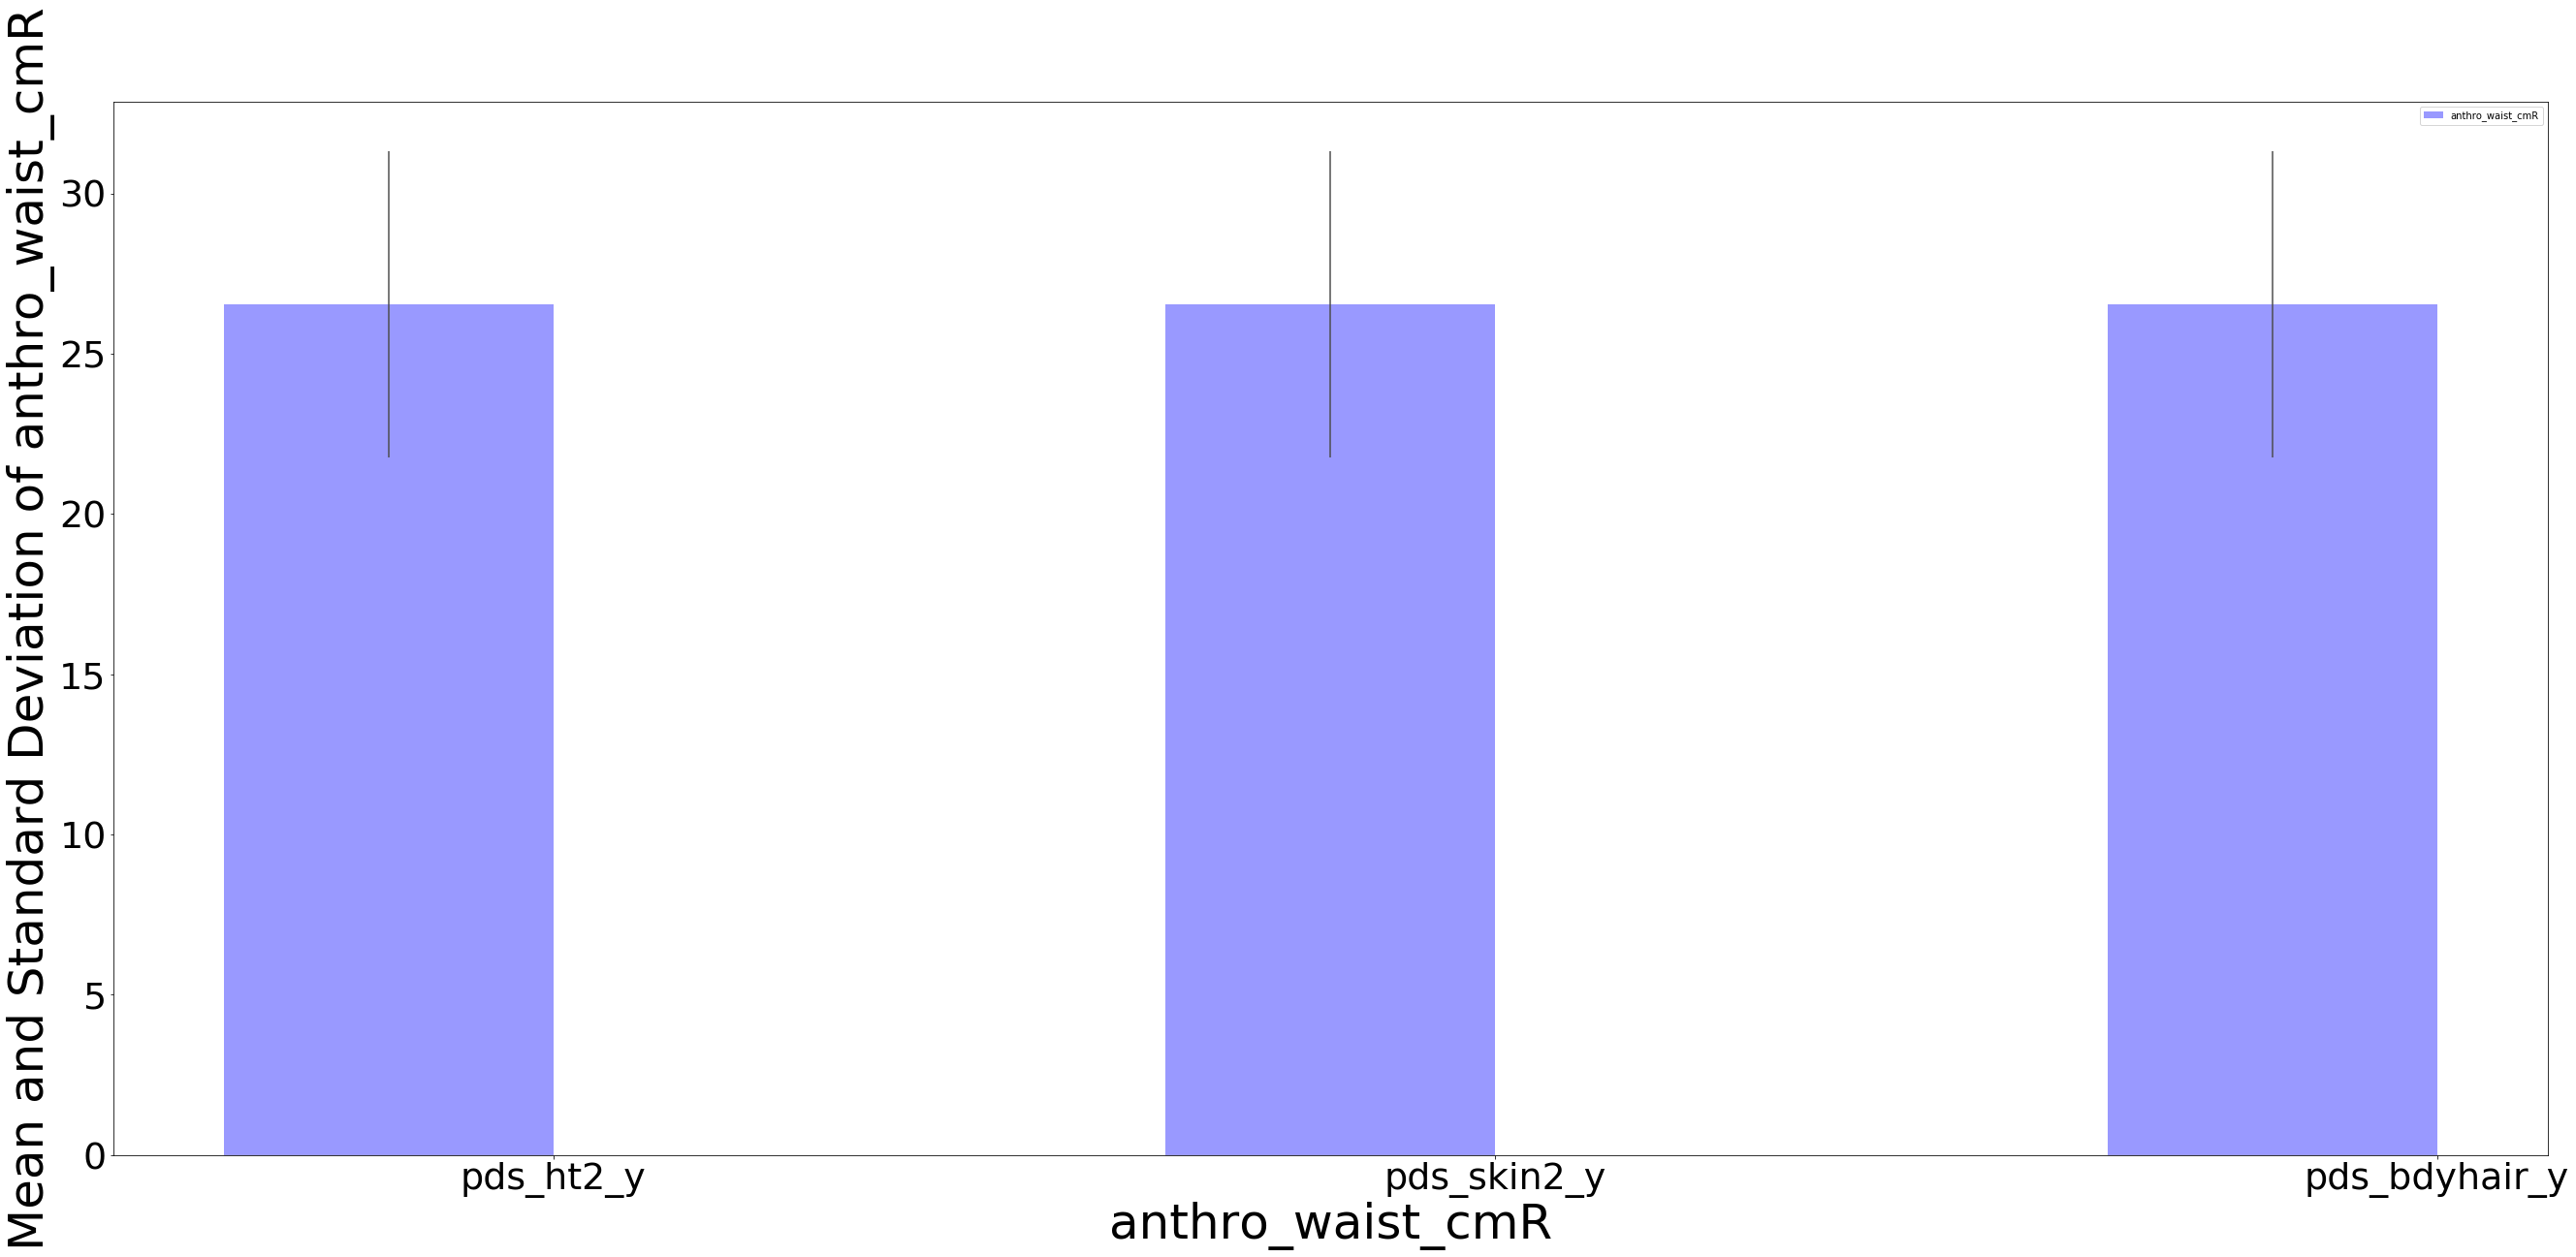

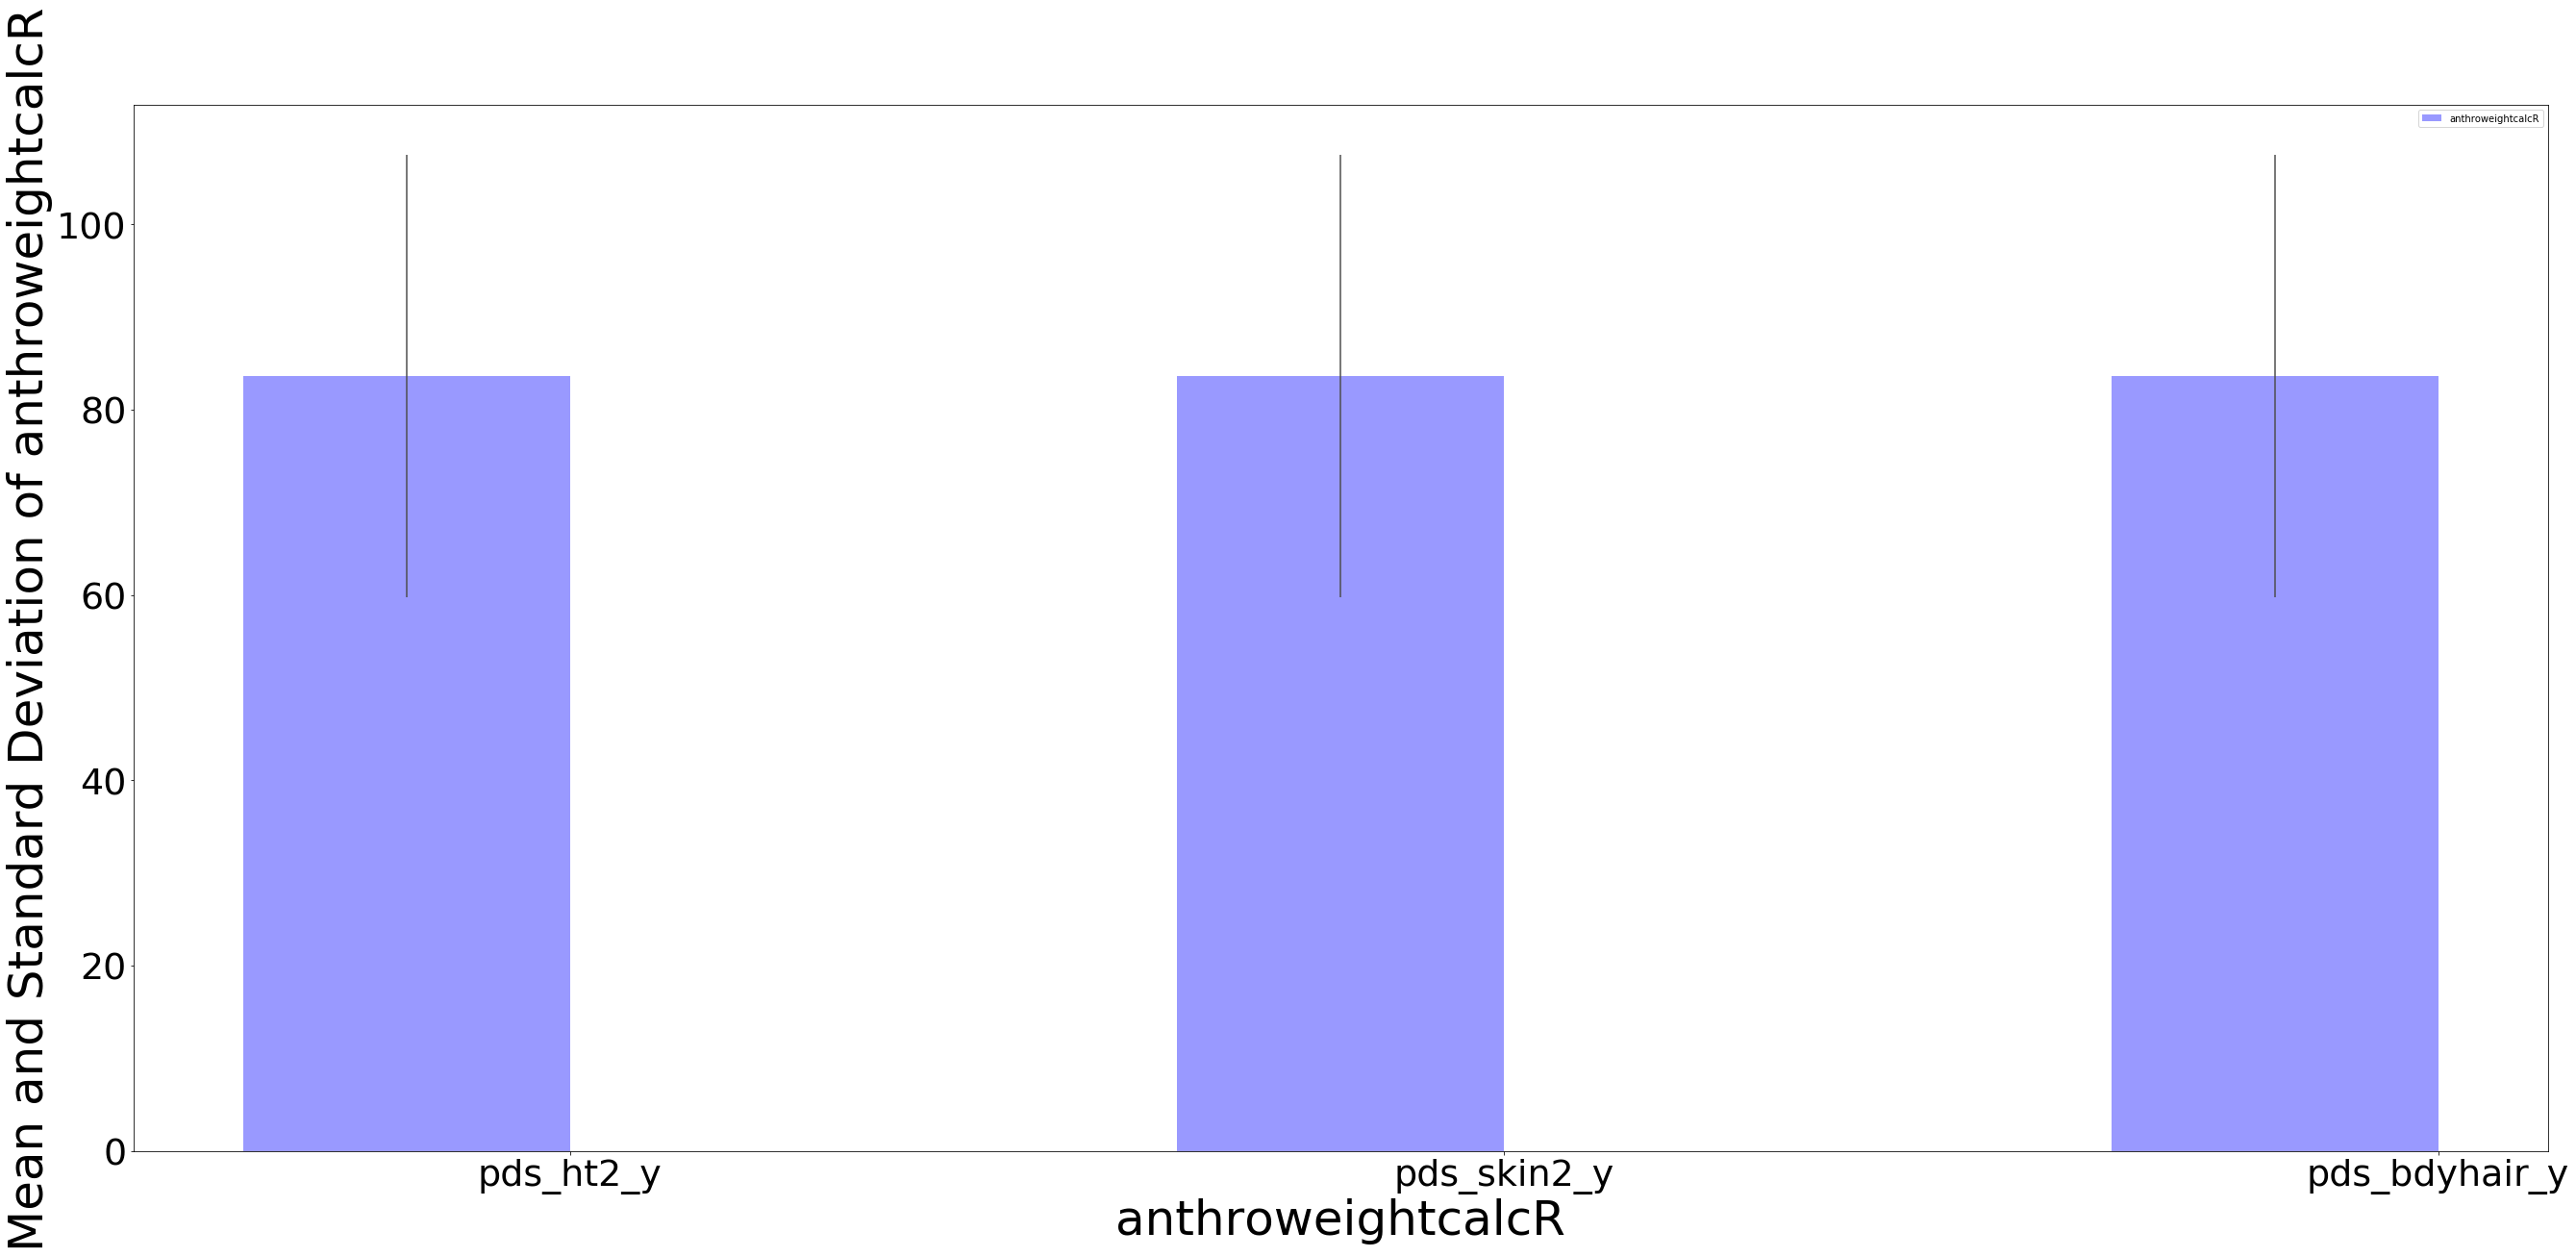

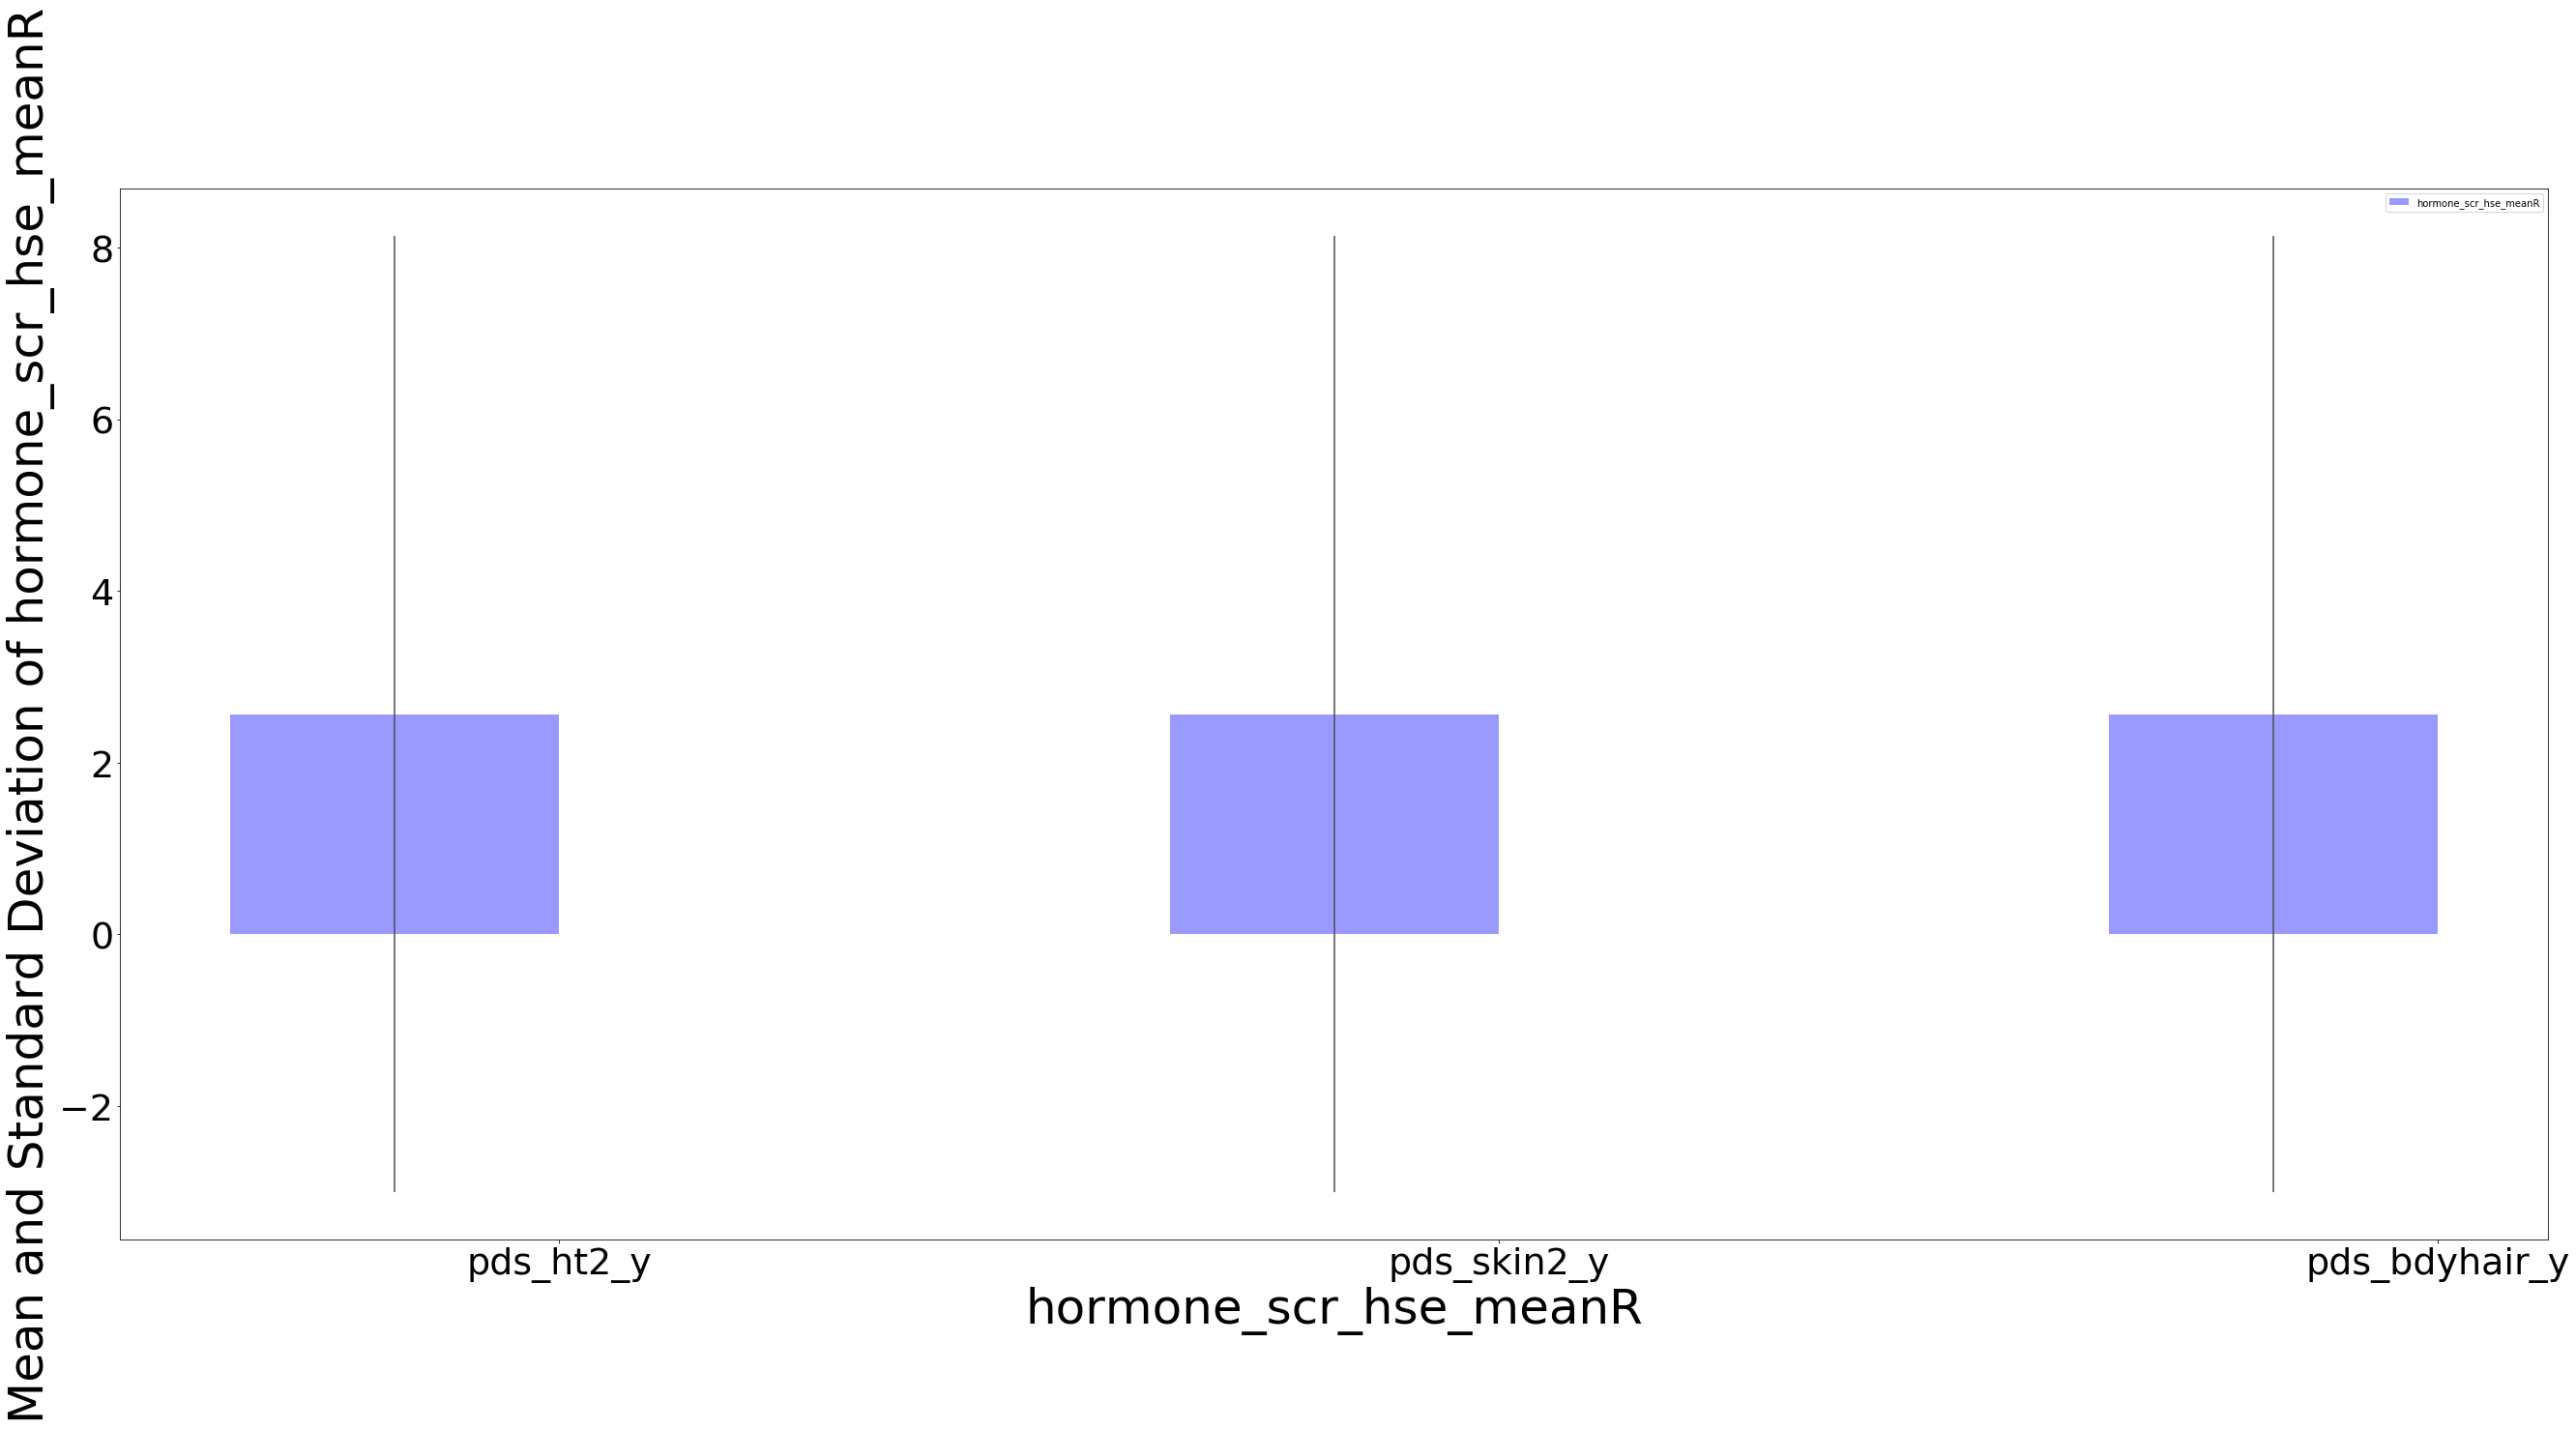

In [28]:
n_groups = 3

listOcool = ['pds_skin2_yR', 'anthro_waist_cmR', 'anthroweightcalcR', 'hormone_scr_hse_meanR']

for item in listOcool:
    means_CP1 = total_g['%s'%item].mean()
    std_CP1 = total_g['%s'%item].std()

    fig, ax = plt.subplots(figsize=(45, 20))

    index = np.arange(n_groups)
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, means_CP1, bar_width,
                    alpha=opacity, color='b',
                    yerr=std_CP1, error_kw=error_config,
                    label=item)

    ax.set_xlabel('%s'%item, fontsize = 50)
    ax.set_ylabel('Mean and Standard Deviation of %s'%item, fontsize = 50)
    
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(names[0:12], fontsize = 28)
    ax.legend()
    ax.tick_params(labelsize = 38)

    fig=plt.figure(figsize=(100, 16), dpi= 80, facecolor='w', edgecolor='k')
    fig.tight_layout()
    plt.show()

want this but colored the dots each time

In [29]:
total_g.to_csv('/Users/gracer/Google Drive/ABCD/important_txt/female_puberty_ana.csv', sep=',')

* All_clust (180,)<- length of the subjects over all runs
* All_clust_space(180,)<-length of the subjects over all runs
* All_means(180,)<-length of the subjects
* All_labels(180,) <- length of subjects True Labels
* All_index(180,)<-length of subjects Index of the original data
* All_comp(18, 12)<- rows are the the PCA components, times the number of the levels, and the number of runs. cols are the factors
* All_var_ratio(108, 2)<-rows are the number of runs, times the number of factors, times the number of levels
* All_var(3, 6)<- rows are the number of runs, the columns are the PCA componenets times the number of levels
* All_mean(9, 12)<- rows are the number of runs by the number of levels the columns are the number of factors
* All_data(180, 14)<-rows are the number of subjects, the columns are number of factors plus the index, plus the components

In [48]:
varsy =[All_clust ,All_clust_space,All_labels , All_index, All_comp, All_var_ratio,All_data, names, All_lev1Ratio, All_lev2Ratio, All_lev3Ratio, kmeans] 

In [50]:
all_vars = {}
keys = vars =['All_clust' ,'All_clust_space','All_labels' , 
              'All_index', 'All_comp', 'All_var_ratio','All_data', 
              'names',' All_lev1Ratio', 'All_lev2Ratio',' All_lev3Ratio', 'kmeans'] 

for i in range(0,len(keys)):
    all_vars[keys[i]] = varsy[i]


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
import pickle

filename = '/Users/gracer/Google Drive/ABCD/important_txt/data.pickle'
with open(filename, 'wb') as handle:
    pickle.dump(all_vars, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print all_vars == b

* components_ : array, shape (n_components, n_features)

* explained_variance_ratio_ : array, shape (n_components,)

*  singular_values_ : array, shape (n_components,)

*  mean_ : array, shape (n_features,)

*  n_components_ : int

*  noise_variance_ : float